# 1. Introduction

# Libraries and Data importation

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_parquet(r"C:\Users\mirko\Desktop\Curso Data Science DL\EDAHospDischarges_Chile2001-2024\data\processed\Discharges_2001-2024_analysis_finalversion.parquet")

# 2. Data Overview

# Shape of the dataset (rows, columns).

In [9]:
df.head()

,sex,age,health insurance,healthcare facility type,healthcare facility name,length of stay,discharge condition,primary diagnosis code,primary diagnosis name,year
0,Hombre,"[60, 69]",Fonasa,Privado,Clínica Familia,2,Muerto,C780,tumor maligno secundario del pulmon,2001
1,Hombre,"[70, 79]",Fonasa,Publico,"Hospital Del Salvador (Santiago, Providencia)",58,Muerto,E145,"diabetes mellitus no especificada, con complic...",2001
2,Hombre,"[70, 79]",Fonasa,Publico,"Hospital Del Salvador (Santiago, Providencia)",12,Muerto,J189,"neumonia, no especificada",2001
3,Hombre,"[1, 9]",Fonasa,Publico,Instituto de Neurocirugía Dr. Alfonso Asenjo,1,Muerto,S065,hemorragia subdural traumatica,2001
4,Hombre,"[80, 120]",Fonasa,Publico,Hospital Dr. Leonardo Guzmán (Antofagasta),7,Vivo,K830,colangitis,2001


In [11]:
df.shape

(25758741, 10)

# Data dictionary / main variables (categorical, numerical).

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25758741 entries, 0 to 25758740
Data columns (total 10 columns):
 #   Column                    Dtype   
---  ------                    -----   
 0   sex                       category
 1   age                       object  
 2   health insurance          category
 3   healthcare facility type  category
 4   healthcare facility name  object  
 5   length of stay            int32   
 6   discharge condition       category
 7   primary diagnosis code    object  
 8   primary diagnosis name    object  
 9   year                      int32   
dtypes: category(4), int32(2), object(4)
memory usage: 1.1+ GB


# Missing values / NA treatment summary.

In [17]:
df.isna().sum()

sex                         0
age                         0
health insurance            0
healthcare facility type    0
healthcare facility name    0
length of stay              0
discharge condition         0
primary diagnosis code      0
primary diagnosis name      0
year                        0
dtype: int64

The dataframe is completely clean without any missing value. For healthcare facility name the data was missing from 2021 to 2024 and healthcare facility type had around 20% of NaNs, mainly on year 2023. All these values were imputed to "Unknown" to preserve the rest of the data, considering it was not missing at random, so bias could be introduced in case of deletion. The rest of the variables had NaNs and were deleted becasue it did not affected the representativeness of the sample.

# First impressions after cleaning (anything noteworthy?).

It was complex to manage 24 dataframes and explore the data, particulary the missing values and take important decisions to ensure data integrity and accuracy at the same time. There are many duplicates and that is the main uncertainty about the realiability of the information, but it was chosen to just delete duplicates when the patient ID was available, making more evident that some rows were real duplicates. There are many health problems that are highly prevalent and common among specific kind of patients, so it would not be surprising that similar rows are different discharges even if they are completely identical and no ID is available.

# 3. Univariate Analysis

In [23]:
df.columns

Index(['sex', 'age', 'health insurance', 'healthcare facility type',
       'healthcare facility name', 'length of stay', 'discharge condition',
       'primary diagnosis code', 'primary diagnosis name', 'year'],
      dtype='object')

# Categorical variables (4)

# Sex

In [27]:
df.sex.value_counts()

sex
Hombre    13290560
Mujer     12468181
Name: count, dtype: int64

In [31]:
df.sex.value_counts(normalize = True)*100

sex
Hombre    51.596311
Mujer     48.403689
Name: proportion, dtype: float64

In [47]:
df["sex"] = df["sex"].cat.rename_categories({"Hombre": "Male", "Mujer": "Female"})


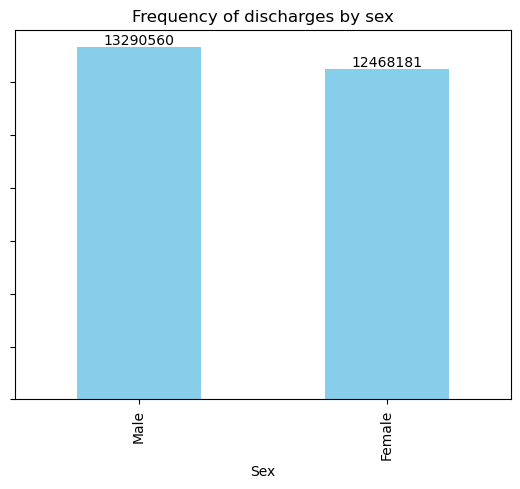

In [61]:
# Get value counts
counts = df['sex'].value_counts()

# Plot bar chart
ax = counts.plot(kind='bar', color='skyblue')

# Add counts on top of each bar
for i, count in enumerate(counts):
    ax.text(i, count + 0.05, str(count), ha='center', va='bottom')

plt.xlabel('Sex')
plt.ylabel(None)
plt.title('Frequency of discharges by sex')
plt.tick_params(labelleft=False)
plt.show()


# Health insurance

In [66]:
df["health insurance"].value_counts()

health insurance
Fonasa    20688143
Isapre     5070598
Name: count, dtype: int64

In [68]:
df["health insurance"].value_counts(normalize = True)*100

health insurance
Fonasa    80.315039
Isapre    19.684961
Name: proportion, dtype: float64

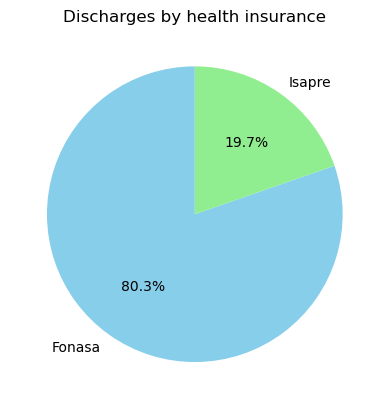

In [72]:
# Get value counts
counts = df['health insurance'].value_counts()

# Plot pie chart with percentages
counts.plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightgreen'], startangle=90)
plt.ylabel('')  # Remove default y-label
plt.title('Discharges by health insurance')
plt.show()


# Healthcare facility type

In [76]:
df["healthcare facility type"].value_counts()

healthcare facility type
Publico    17489355
Privado     7050600
Unknown     1218786
Name: count, dtype: int64

In [78]:
df["healthcare facility type"].value_counts(normalize = True)*100

healthcare facility type
Publico    67.896777
Privado    27.371679
Unknown     4.731543
Name: proportion, dtype: float64

In [98]:
df.groupby("healthcare facility type", observed=False)["healthcare facility name"].nunique()

healthcare facility type
Privado    259
Publico    217
Unknown      1
Name: healthcare facility name, dtype: int64

In [106]:
df["healthcare facility type"] = df["healthcare facility type"].cat.rename_categories({"Publico": "Public", "Privado": "Private"})

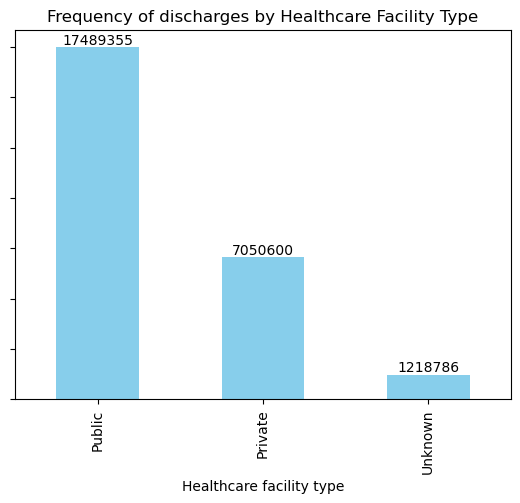

In [112]:
# Get value counts
counts = df['healthcare facility type'].value_counts()

# Plot bar chart
ax = counts.plot(kind='bar', color='skyblue')

# Add counts on top of each bar
for i, count in enumerate(counts):
    ax.text(i, count + 0.05, str(count), ha='center', va='bottom')

plt.xlabel('Healthcare facility type')
plt.ylabel(None)
plt.title('Frequency of discharges by Healthcare Facility Type')
plt.tick_params(labelleft=False)
plt.show()


# Discharge Condition

In [117]:
df["discharge condition"].value_counts()

discharge condition
Vivo      25029231
Muerto      729510
Name: count, dtype: int64

In [119]:
df["discharge condition"].value_counts(normalize = True)*100

discharge condition
Vivo      97.167913
Muerto     2.832087
Name: proportion, dtype: float64

In [121]:
df["discharge condition"] = df["discharge condition"].cat.rename_categories({"Vivo": "Alive", "Muerto": "Deceased"})

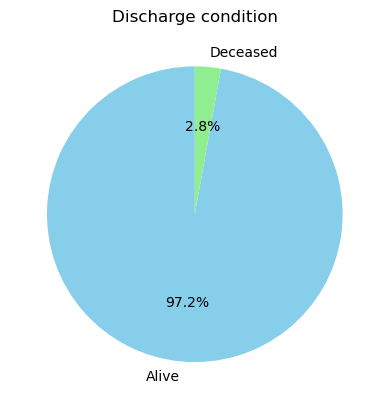

In [125]:
# Get value counts
counts = df['discharge condition'].value_counts()

# Plot pie chart with percentages
counts.plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightgreen'], startangle=90)
plt.ylabel('')  # Remove default y-label
plt.title('Discharge condition')
plt.show()


# Bivariate and Multivariate Analysis

# Guiding Questions

# Visualizations

# Insights and questions

1. How the distribution of the data is affected if healthy newborns are not considered in the analysis?

In [40]:
df.columns

Index(['Sex', 'Age', 'Health insurance', 'Healthcare facility type',
       'Healthcare facility name', 'Length of stay', 'Discharge condition',
       'Primary diagnosis code', 'Primary diagnosis name', 'Year'],
      dtype='object')